### Q1 Series 만들기

In [125]:
import numpy as np
import pandas as pd

In [35]:
idx = ["HDD", "SSD", "USB", "CLOUD"]
data = [19, 11, 5, 97]

In [36]:
# 위 데이터로 Series 구현
series = pd.Series(data, idx)

In [37]:
series

HDD      19
SSD      11
USB       5
CLOUD    97
dtype: int64

In [46]:
# 10 이상 20 이하를 가지는 데이터만 이용해 다시 series를 정의
series = series[(series > 10) & (series < 20)]

In [47]:
print(series)

HDD    19
SSD    11
dtype: int64


### Q2
- 다음과 같이 과일과 야채가 각각 정리된 데이터가 있다.

![image-2.png](attachment:image-2.png "표 이미지")
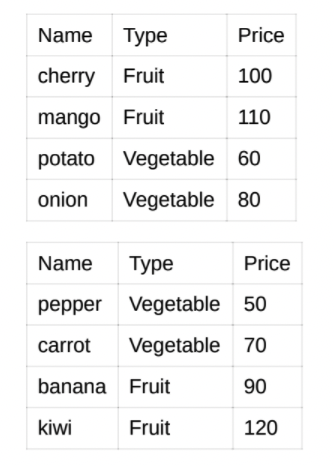

1. 각 표에 정리된 데이터를 각각 하나의 데이터 프레임으로 생성
1. 두 데이터를 하나의 데이터로 결합
1. 결합한 데이터의 type을 이용해 데이터를 정렬
1. 최종적으로 과일과 야채 중 가장 비싼 가격의 합을 출력

In [129]:
from pandas import DataFrame

In [73]:
data1 = [['cherry', 'Fruit', 100], ['mango', 'Fruit', 110], ['potato', 'Vegetable', 60], ['onion', 'Vegetable', 80]]
data2 = [['pepper', 'Vegetable', 50], ['carrot', 'Vegetable', 70], ['banana', 'Fruit', 90], ['kiwi', 'Fruit', 120]]

In [130]:
df1 = pd.DataFrame(data1, columns = ["Name", "Type", "Price"])
df2 = pd.DataFrame(data2, columns = ["Name", "Type", "Price"])

In [131]:
df1

,Name,Type,Price
0,cherry,Fruit,100
1,mango,Fruit,110
2,potato,Vegetable,60
3,onion,Vegetable,80


In [132]:
df2

,Name,Type,Price
0,pepper,Vegetable,50
1,carrot,Vegetable,70
2,banana,Fruit,90
3,kiwi,Fruit,120


In [80]:
# df1, df2를 columns 를 이용해 결합
df3 = pd.concat([df1, df2], axis=0)

In [81]:
df3

,Name,Type,Price
0,cherry,Fruit,100
1,mango,Fruit,110
2,potato,Vegetable,60
3,onion,Vegetable,80
0,pepper,Vegetable,50
1,carrot,Vegetable,70
2,banana,Fruit,90
3,kiwi,Fruit,120


In [96]:
# 결합한 데이터를 type을 이용해 정렬, 가격을 내림차순으로 정리
df_fruit = df3.loc[df3["Type"] == "Fruit"].sort_values("Price", ascending=False)
df_veg = df3.loc[df3["Type"] == "Vegetable"].sort_values("Price", ascending=False)

In [189]:
print(df_fruit)
print(df_veg)

     Name   Type  Price
3    kiwi  Fruit    120
1   mango  Fruit    110
0  cherry  Fruit    100
2  banana  Fruit     90
     Name       Type  Price
3   onion  Vegetable     80
1  carrot  Vegetable     70
2  potato  Vegetable     60
0  pepper  Vegetable     50


In [111]:
# Fruit과 Vegetable 상위 2개의 가격의 합을 출력
print("Sum of Top 2 Fruit price : ", sum(df_fruit["Price"][:2]))
print("Sum of Top 2 Fruit price : ", sum(df_veg["Price"][:2]))

Sum of Top 2 Fruit price :  230
Sum of Top 2 Fruit price :  150


### Q3. 총 5명이서 게임을 진행했습니다. 총 5개 라운드를 진행, 각 참여자당 5개의 점수를 받았다. </br>주어진 데이터를 dataFrame 형태로 만든 후 각 세부 구현을 진행

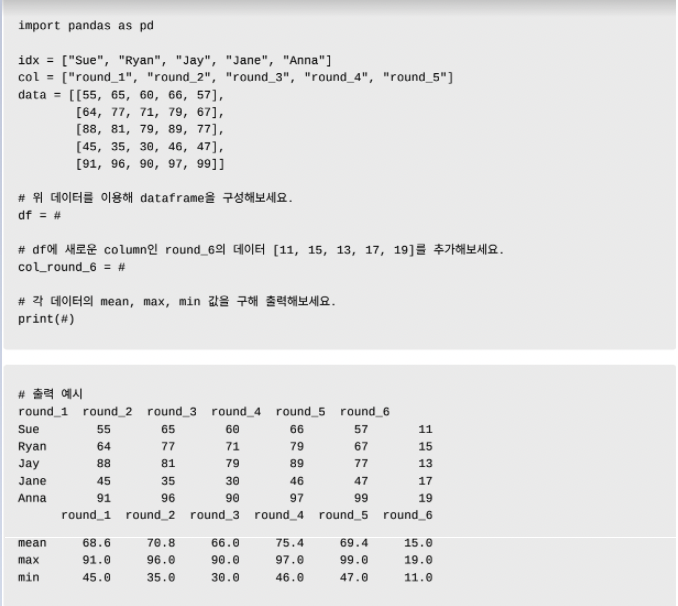

1. 각 참여자의 이름을 index 로 해서 각 라운드의 칼럼을 추가해 데이터를 정리
2. 6번째 라운드의 점수가 아래와 같을 때 이를 추가
3. 각 데이터의 mean, max, min 값을 출력

In [126]:
idx = ["Sue", "Ryan", "Jay", "Jane", "Anna"]
col = ["round_1", "round_2", "round_3", "round_4", "round_5"]
data = [
    [55, 65, 60, 66, 57],
    [64, 77, 71, 79, 67],
    [88, 81, 79, 89, 77], 
    [45, 35, 30, 46, 47], 
    [91, 96, 90, 97, 99],
]

In [133]:
# 위 데이터를 이용해 dataFrame을 구성
df = pd.DataFrame(data, idx, col)

In [134]:
df

,round_1,round_2,round_3,round_4,round_5
Sue,55,65,60,66,57
Ryan,64,77,71,79,67
Jay,88,81,79,89,77
Jane,45,35,30,46,47
Anna,91,96,90,97,99


In [135]:
# df에 새로운 column인 round_6의 데이터 [11, 15, 13, 17, 19] 를 추가하기
col_round6 = [11, 15, 13, 17, 19]

In [136]:
df["round_6"] = col_round6
df

,round_1,round_2,round_3,round_4,round_5,round_6
Sue,55,65,60,66,57,11
Ryan,64,77,71,79,67,15
Jay,88,81,79,89,77,13
Jane,45,35,30,46,47,17
Anna,91,96,90,97,99,19


In [185]:
# 각 데이터의 mean, max, min 값을 구해 출력하기
df_mean = pd.DataFrame(df.mean(), columns=["mean"]).transpose()
df_mean

,round_1,round_2,round_3,round_4,round_5,round_6
mean,68.6,70.8,66.0,75.4,69.4,15.0


In [184]:
df_max = pd.DataFrame(df.max(), columns=["max"]).transpose()
df_max

,round_1,round_2,round_3,round_4,round_5,round_6
max,91,96,90,97,99,19


In [178]:
df_min = pd.DataFrame(df.min(), columns=["min"]).transpose()
df_min

,round_1,round_2,round_3,round_4,round_5,round_6
min,45,35,30,46,47,11


In [179]:
result = pd.concat([df_mean, df_max, df_min])

In [186]:
result

,round_1,round_2,round_3,round_4,round_5,round_6
mean,68.6,70.8,66.0,75.4,69.4,15.0
max,91.0,96.0,90.0,97.0,99.0,19.0
min,45.0,35.0,30.0,46.0,47.0,11.0


In [183]:
df.describe().loc[["mean", "max", "min"]]

,round_1,round_2,round_3,round_4,round_5,round_6
mean,68.6,70.8,66.0,75.4,69.4,15.0
max,91.0,96.0,90.0,97.0,99.0,19.0
min,45.0,35.0,30.0,46.0,47.0,11.0
